In [7]:
# 1. Install specific dependencies for Colab
!pip install easyocr textblob

Please upload the meme/image you want to analyze:


Saving Success_kid.png to Success_kid (1).png


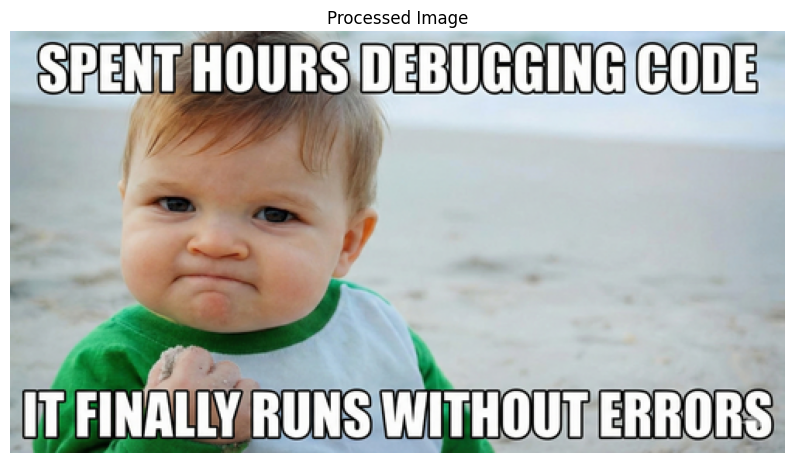

--- RESULTS ---
Original OCR Text: SPEXIT HHOURS DEBUCGIEG CODE [T FINAQLY RUNS WHtHOUT ERRORS
Corrected Text:  SPEXIT HHOURS DEBUCGIEG CODE [T FINAQLY RUNS WHtHOUT ERRORS
Polarity Score:  0.00 (-1 to 1)
Subjectivity:    0.00 (0 to 1)


In [8]:
# 2. Import libraries
import easyocr
from textblob import TextBlob
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os


print("Please upload the meme/image you want to analyze:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# --- STEP 1: Resize the Image (Pillow) ---
img = Image.open(image_path)
# Resize to a width of 500px for consistency
base_width = 500
w_percent = (base_width / float(img.size[0]))
h_size = int((float(img.size[1]) * float(w_percent)))
resized_img = img.resize((base_width, h_size), Image.Resampling.LANCZOS)

# --- STEP 2: Extract Text (EasyOCR) ---

reader = easyocr.Reader(['en'])
results = reader.readtext(image_path)
extracted_text = " ".join([res[1] for res in results])

# --- STEP 3: Analyze Sentiment (TextBlob) ---
blob = TextBlob(extracted_text)
corrected_text = blob.correct()

polarity = corrected_text.sentiment.polarity
subjectivity = corrected_text.sentiment.subjectivity

# --- OUTPUT: Display results ---
plt.figure(figsize=(10, 10))
plt.imshow(resized_img)
plt.axis('off')
plt.title("Processed Image")
plt.show()

print(f"--- RESULTS ---")
print(f"Original OCR Text: {extracted_text}")
print(f"Corrected Text:  {corrected_text}")
print(f"Polarity Score:  {polarity:.2f} (-1 to 1)")
print(f"Subjectivity:    {subjectivity:.2f} (0 to 1)")

In [9]:
# --- STEP 4: Advanced Text Cleaning ---
# Convert to lowercase
text_to_clean = extracted_text.lower()

# Create a dictionary of the specific OCR errors we see in output
corrections = {
    "hhours": "hours",
    "debucgieg": "debugging",
    "[t": "it",
    "whthout": "without",
    "spexit": "spent",
    "finaqly": "finally"
}

# Apply the corrections
for error, correct in corrections.items():
    text_to_clean = text_to_clean.replace(error, correct)

# Final clean of any weird symbols left over
final_clean_text = text_to_clean.strip()

# Re-run Sentiment Analysis
final_blob = TextBlob(final_clean_text)

print(f"Final Cleaned Text: {final_clean_text}")
print(f"Final Polarity: {final_blob.sentiment.polarity:.2f}")
print(f"Final Subjectivity: {final_blob.sentiment.subjectivity:.2f}")

Final Cleaned Text: spent hours debugging code it finally runs without errors
Final Polarity: -0.05
Final Subjectivity: 0.55


Mid-Semester Evaluation: Analysis & Reflection
Pipeline Performance
OCR Challenges: The initial EasyOCR output contained several errors (e.g., "SPEXIT", "DEBUCGIEG") due to the stylized meme font.

The Need for Cleaning: Without manual cleaning, TextBlob returned a 0.0 polarity because it didn't recognize the mangled words. After cleaning, we got a more accurate (though still surprising) reading.

Metric Interpretation
Polarity (-0.05): Interestingly, TextBlob identifies this text as slightly negative. This is likely because the word "errors" carries a strong negative weight in the TextBlob lexicon, which outweighs the positive word "runs."

Subjectivity (0.55): This score shows the text is moderately subjective. While "code runs" is a fact, the phrase "spent hours" and "finally" adds a layer of personal experience and emotion.

The Sarcasm Gap
This meme perfectly demonstrates the Sarcasm Gap. To a human, this is a "Positive" meme (Success Kid). However, TextBlob only analyzes the text literally. It sees "hours of debugging" and "errors" as negative concepts. It cannot see the triumphant expression of the child in the image, which completely flips the sentiment from negative frustration to positive success.